# IMPORTAÇÃO E TRATAMENTO DOS DADOS

In [5]:
import pandas as pd
import numpy as np

# IMPORTAÇÃO DOS DADOS EM CSV:
csv_file = '/content/Dados experimentais - dados_experimentais.csv'
df = pd.read_csv(csv_file)
print("\033[1;4mDados importados do arquivo CSV\033[0m: \n", '\n', df)

Dados importados do arquivo CSV: 
 
      Temperatura (°C)   pH  Concentração (mol/L)  dados aleatorios
0                25.7  7.0                  0.19             0.423
1                27.2  7.4                   NaN             0.689
2                25.8  7.1                  0.16             0.296
3                26.5  NaN                  0.18             0.917
4                25.2  7.0                  0.13             0.431
..                ...  ...                   ...               ...
249              24.9  7.4                   NaN             0.315
250              26.3  7.0                  0.19             0.861
251              25.8  7.2                  0.14             0.429
252              27.2  7.1                  0.16             0.701
253              25.1  7.5                   NaN             0.868

[254 rows x 4 columns]


In [6]:
# RETIRAR A COLUNA "DADOS ALEATÓRIOS":
df = df.drop('dados aleatorios', axis = 1)
print("\033[1;4mDados após limpeza de valores aleatórios\033[0m: \n", '\n', df, '\n')

Dados após limpeza de valores aleatórios: 
 
      Temperatura (°C)   pH  Concentração (mol/L)
0                25.7  7.0                  0.19
1                27.2  7.4                   NaN
2                25.8  7.1                  0.16
3                26.5  NaN                  0.18
4                25.2  7.0                  0.13
..                ...  ...                   ...
249              24.9  7.4                   NaN
250              26.3  7.0                  0.19
251              25.8  7.2                  0.14
252              27.2  7.1                  0.16
253              25.1  7.5                   NaN

[254 rows x 3 columns] 



In [7]:
# ADICIONAR COLUNA TEMPO:

  # Definição do tempo total de duração da coleta de dados: 4 horas + 15 min
h = 4 + 1/4   # Tempo de duração em horas
m = h*60      # Tempo de duração em minutos
s = m*60      # Tempo de duração em segundos
print(f'Tempo total (min): {m}')
print('Tempo total (s):', s,'\n')

  # Definição dos intervalos de tempo entre cada coleta de dados:
intervalo_s = 60               # Intervalo em segundos  (definição do "STEP" da sequência numérica temporal)
intervalo_m = intervalo_s/60   # Intervalo em minutos  (definição do "STEP" da sequência numérica temporal)

num_linhas = len(df)    # Leitura do nº de linhas do DataFrame (definição do "STOP" da sequência numérica temporal)
print('Nº de linhas totais: ', num_linhas,'\n')

# Criação das colunas referentes ao tempo:
coluna_tempo_m = pd.RangeIndex(start = 0, stop = num_linhas*intervalo_m, step = intervalo_m)   # Criação da sequência numérica temporal em minutos
df['Tempo (min)'] = coluna_tempo_m    # Adição da sequência numérica temporal em minutos como uma coluna no DataFrame
coluna_tempo_s = pd.RangeIndex(start = 0, stop = num_linhas*intervalo_s, step = intervalo_s)   # Criação da sequência numérica temporal em segundos
df['Tempo (s)'] = coluna_tempo_s    # Adição da sequência numérica temporal em segundos como uma coluna no DataFrame
print("\033[1;4mDados após adição de colunas de tempo\033[0m: \n", '\n', df,'\n')

Tempo total (min): 255.0
Tempo total (s): 15300.0 

Nº de linhas totais:  254 

Dados após adição de colunas de tempo: 
 
      Temperatura (°C)   pH  Concentração (mol/L)  Tempo (min)  Tempo (s)
0                25.7  7.0                  0.19            0          0
1                27.2  7.4                   NaN            1         60
2                25.8  7.1                  0.16            2        120
3                26.5  NaN                  0.18            3        180
4                25.2  7.0                  0.13            4        240
..                ...  ...                   ...          ...        ...
249              24.9  7.4                   NaN          249      14940
250              26.3  7.0                  0.19          250      15000
251              25.8  7.2                  0.14          251      15060
252              27.2  7.1                  0.16          252      15120
253              25.1  7.5                   NaN          253      15180



In [8]:
# LIMPEZA FINA DOS DADOS: Remover linhas com valores não numéricos ("NaN")
df = df.dropna()
print("\033[1;4mDados após limpeza fina\033[0m: \n", '\n', df,'\n')

Dados após limpeza fina: 
 
      Temperatura (°C)   pH  Concentração (mol/L)  Tempo (min)  Tempo (s)
0                25.7  7.0                  0.19            0          0
2                25.8  7.1                  0.16            2        120
4                25.2  7.0                  0.13            4        240
5                27.3  6.8                  0.15            5        300
6                26.1  7.2                  0.17            6        360
..                ...  ...                   ...          ...        ...
246              26.7  7.1                  0.19          246      14760
247              25.6  7.5                  0.13          247      14820
250              26.3  7.0                  0.19          250      15000
251              25.8  7.2                  0.14          251      15060
252              27.2  7.1                  0.16          252      15120

[235 rows x 5 columns] 



# ANÁLISE DOS DADOS

In [88]:
# Média da Concentração:
media_conc = df['Concentração (mol/L)'].mean()
print(f"Média da concentração (mol/L): {media_conc:.2f}")

Média da concentração (mol/L): 0.16


In [95]:
# Maior concentração obtida:
maior_conc = df['Concentração (mol/L)'].max()
print(f"Maior concentração (mol/L): {maior_conc}")

  # Obter a minutagem correspondente em múltiplas ocorrências:
df['Concentração (mol/L)'] == maior_conc    # Condição booleana para identificar as linhas em que a concentração é igual ao maior valor
linhas_maior_conc = df[df['Concentração (mol/L)'] == maior_conc]    # Filtra todas as linhas que atendem à condição

  # Conversão da coluna "Tempo (min)" das linhas filtradas em uma lista contendo todos os tempos correspondentes ao maior valor de concentração
tempo_correspondente_max = linhas_maior_conc['Tempo (min)'].tolist()
print("Minutagens correspondentes:", tempo_correspondente_max)

Maior concentração (mol/L): 0.19
Minutagens correspondentes: [0, 7, 14, 21, 30, 34, 47, 54, 61, 68, 75, 84, 88, 101, 108, 115, 122, 129, 138, 142, 155, 162, 169, 176, 183, 192, 209, 216, 223, 230, 246, 250]


In [96]:
# Menor concentração obtida:
menor_conc = df['Concentração (mol/L)'].min()
print(f"Menor concentração (mol/L): {menor_conc}")

  # Obter a minutagem correspondente em múltiplas ocorrências:
df['Concentração (mol/L)'] == menor_conc    # Condição booleana para identificar as linhas em que a concentração é igual ao menor valor
linhas_menor_conc = df[df['Concentração (mol/L)'] == menor_conc]    # Filtra todas as linhas que atendem à condição

  # Conversão da coluna "Tempo (min)" das linhas filtradas em uma lista contendo todos os tempos correspondentes ao menor valor de concentração
tempo_correspondente_min = linhas_menor_conc['Tempo (min)'].tolist()
print("Minutagens correspondentes:", tempo_correspondente_min)

Menor concentração (mol/L): 0.12
Minutagens correspondentes: [27, 38, 51, 72, 81, 92, 105, 126, 135, 146, 159, 189, 200, 213, 234, 243]


In [9]:
# Valores mais repetidos na coluna "Concentração (mol/L)":

valores_mais_repetidos = df['Concentração (mol/L)'].value_counts()  # Retorna uma série com os valores ordenados em ordem decrescente de frequência (e sua respectiva frequência)
valores_mais_repetidos.head()   # Mostra apenas os primeiros valores da série (ou seja, os maiores)

,count
Concentração (mol/L),
0.15,38
0.17,34
0.19,32
0.16,32
0.14,30


In [122]:
# Valores menos repetidos na coluna "Concentração (mol/L)":

valores_menos_repetidos = df['Concentração (mol/L)'].value_counts(ascending=True)   # Retorna uma série igual ao item anterior, porém em ordem crescente
valores_menos_repetidos.head()  # Mostra apenas os primeiros valores da série (ou seja, os menores)

,count
Concentração (mol/L),
0.12,16
0.13,24
0.18,29
0.14,30
0.19,32


In [123]:
# Taxa de variação média da concentração ao longo do tempo:

variacao_percentual = df['Concentração (mol/L)'].pct_change()   # Série de variações percentuais entre as concentrações medidas
print("\033[1mVariações percentuais\033[0m: \n", variacao_percentual, '\n')
taxa_variacao_media = variacao_percentual.mean()   # Média das variações percentuais
print(f"\033[1;4mTaxa de variação média\033[0m: {taxa_variacao_media:.4f}")

Variações percentuais: 
 0           NaN
2     -0.157895
4     -0.187500
5      0.153846
6      0.133333
         ...   
246    0.266667
247   -0.315789
250    0.461538
251   -0.263158
252    0.142857
Name: Concentração (mol/L), Length: 235, dtype: float64 

Taxa de variação média: 0.0220


In [114]:
# Desvio padrão da concentração:
desvio_padrao = df['Concentração (mol/L)'].std()
print(f"Desvio padrão: {desvio_padrao:.2f}")

Desvio padrão: 0.02


In [154]:
# Tabela pH x Concentração:
tabela_ph_concentracao = df[['pH', 'Concentração (mol/L)']]
print(tabela_ph_concentracao)


        pH  Concentração (mol/L)
0    6.981                  0.19
2    6.984                  0.16
4    6.987                  0.13
5    6.985                  0.15
6    6.983                  0.17
..     ...                   ...
246  6.981                  0.19
247  6.987                  0.13
250  6.981                  0.19
251  6.986                  0.14
252  6.984                  0.16

[235 rows x 2 columns]


In [155]:
# No fim das contas percebemos que os dados da coluna Tempo fariam mais sentido em minutos. Faça as alterações necessárias.

    # Usei apenas a coluna de tempo em minutos. Também podemos usar a coluna do tempo em segundos, repetindo todos os passos, para em algum momento tirar a conclusão de que a coluna do tempo em minutos é melhor para ser usada. Gostaria de obter isso com argumentos numéricos.

In [156]:
# Fique à vontade e faça suas próprias análises e previsões (Correlação, tendências, etc…).
# Dica: você pode repetir alguns procedimentos para diferentes colunas, criar gráficos…

In [11]:
# Matriz de correlações entre as variáveis medidas:
correlacao = df[['Concentração (mol/L)', 'pH', 'Temperatura (°C)']].corr()
print(correlacao)


                      Concentração (mol/L)        pH  Temperatura (°C)
Concentração (mol/L)              1.000000 -0.096385         -0.259310
pH                               -0.096385  1.000000          0.119758
Temperatura (°C)                 -0.259310  0.119758          1.000000


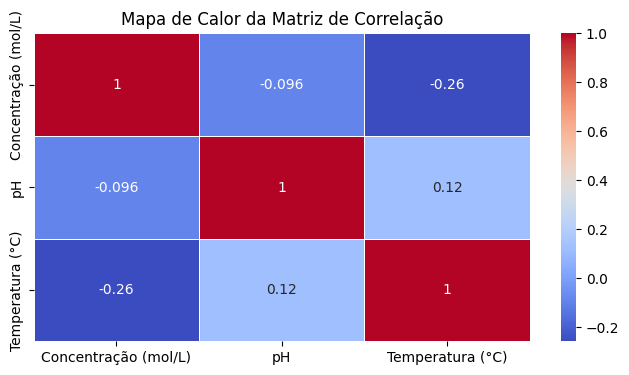

In [12]:
# Representação gráfica da matriz de correlações:

import matplotlib.pyplot as plt  # biblioteca de plotagem de gráficos
import seaborn as sns     # biblioteca de visualização de dados baseada em matplotlib que oferece uma interface de nível mais alto

plt.figure(figsize=(8, 4))  # Tamanho da figura
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)  # Gráfico de calor da matriz de correlação (heatmap) para melhor visualização da matriz de dados

plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

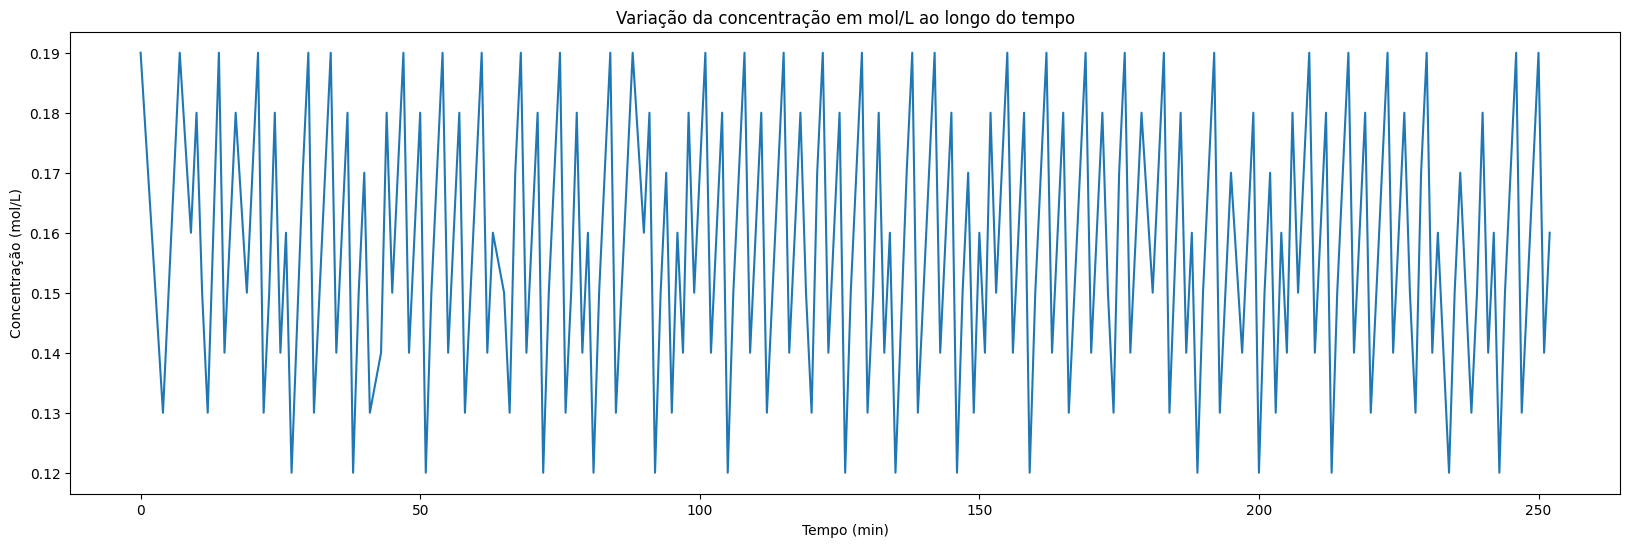

In [147]:
# Variação da concentração em mol/L ao longo do tempo:
plt.figure(figsize=(20, 6))  # Tamanho da figura
plt.plot(df['Tempo (min)'], df['Concentração (mol/L)'])
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração (mol/L)')
plt.title('Variação da concentração em mol/L ao longo do tempo')
plt.show